# Lab 08. pandas를 활용한 최근접 이웃 보간 실습
---

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

- 시계열 데이터를 생성하고 결측치를 생성한다. 그리고 결측치를 확인해본다.

In [2]:
# 시계열 데이터 생성 
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates, 
    'Value' : values
})

# 결측치 생성
data.loc[50:200, 'Value'] = np.nan

print(data.loc[50:200])

          Date  Value
50  2023-02-20    NaN
51  2023-02-21    NaN
52  2023-02-22    NaN
53  2023-02-23    NaN
54  2023-02-24    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[151 rows x 2 columns]


- `pandas`에서 제공하는 최근접 이웃 보간을 적용해본다.

In [3]:
# 최근접 이웃 보간 적용 
data['Value_filled'] = data['Value'].interpolate(method='nearest')

print(data.loc[201])
print(data.loc[50:200])

Date            2023-07-21 00:00:00
Value                     -0.194602
Value_filled              -0.194602
Name: 201, dtype: object
          Date  Value  Value_filled
50  2023-02-20    NaN      0.603589
51  2023-02-21    NaN      0.603589
52  2023-02-22    NaN      0.603589
53  2023-02-23    NaN      0.603589
54  2023-02-24    NaN      0.603589
..         ...    ...           ...
196 2023-07-16    NaN     -0.194602
197 2023-07-17    NaN     -0.194602
198 2023-07-18    NaN     -0.194602
199 2023-07-19    NaN     -0.194602
200 2023-07-20    NaN     -0.194602

[151 rows x 3 columns]


- 시계열 데이터를 시각화 해본다.

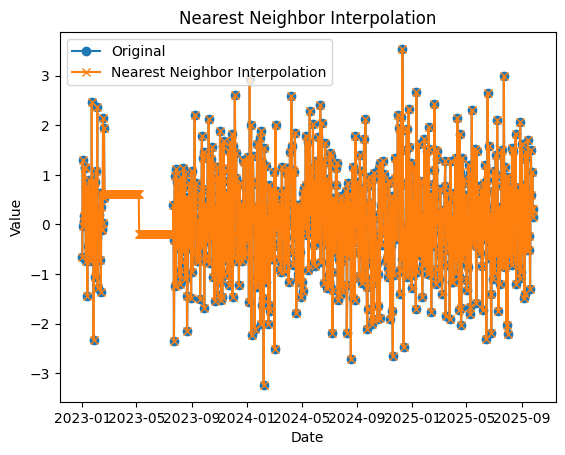

In [4]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_filled'], 'x-', label='Nearest Neighbor Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Nearest Neighbor Interpolation')
plt.legend()

plt.show()